In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data

In [2]:
salaries = pd.read_csv("ds_salaries.csv")
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Clean-up and memory optimization

In [3]:
salaries.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
salaries = salaries.drop(columns = "Unnamed: 0")
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
salaries.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [6]:
# all but our two salary value columns can be changed to category type columns to free memory space
salaries["work_year"] = salaries["work_year"].astype("category")
salaries["experience_level"] = salaries["experience_level"].astype("category")
salaries["employment_type"] = salaries["employment_type"].astype("category")
salaries["job_title"] = salaries["job_title"].astype("category")
salaries["salary_currency"] = salaries["salary_currency"].astype("category")
salaries["employee_residence"] = salaries["employee_residence"].astype("category")
salaries["remote_ratio"] = salaries["remote_ratio"].astype("category")
salaries["company_location"] = salaries["company_location"].astype("category")
salaries["company_size"] = salaries["company_size"].astype("category")

In [7]:
salaries.info() # cut memory usage in half

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(9), int64(2)
memory usage: 25.1 KB


## Exploratory Data Analysis

### Dependent Variable Distribution

<AxesSubplot:xlabel='salary', ylabel='Count'>

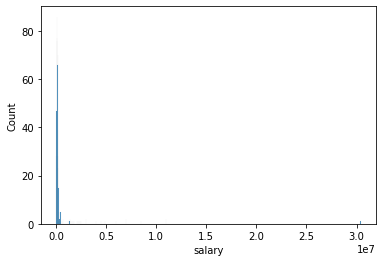

In [8]:
# distribution of salaries
sns.histplot(salaries["salary"])

The dependent variable `salary` is extremely right skewed, but this variable is very misleading. It consists of salaries in many different currencies, so they cannot be compared on the same scale. Let's see if `salary_in_usd` looks better.

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

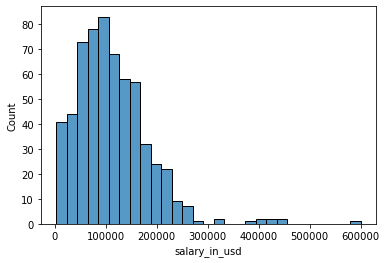

In [9]:
sns.histplot(salaries["salary_in_usd"])
# having all the salaries on the same USD scale makes our distribution look much better
# though we can see the variable is still quite a bit right skewed

The distribution looks a lot better. Going forward, I will us `salary_in_usd` as the dependent variable.

In [10]:
salaries["salary_in_usd"].median()

101570.0

### Dependent Variable Outliers
There are 10 outliers in our dependent variable which will be removed.

In [11]:
Q1 = np.percentile(salaries["salary_in_usd"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(salaries["salary_in_usd"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = (Q3+1.5*IQR)
lower = (Q1-1.5*IQR)

mask = salaries["salary_in_usd"] >= upper
salaries[mask]
# we see 10 outliers from our right skewed variable

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M
519,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L


In [12]:
mask = salaries["salary_in_usd"] <= lower
salaries[mask]
# we see no lower outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [13]:
# remove upper outliers from target variable
mask = salaries["salary_in_usd"] < upper
salaries = salaries[mask]

## Features

### Work Year
Most of the salaries in the data come from 2022. We can see a trend in the boxplot that salary increases and the year increases. The ANOVA test shows that the means are statistically different across years.

<AxesSubplot:xlabel='work_year', ylabel='count'>

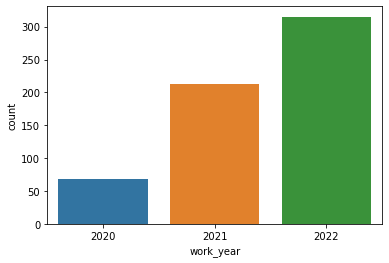

In [14]:
sns.countplot(x = "work_year", data = salaries)
# the count increases each year

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

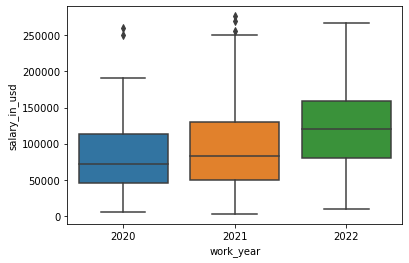

In [15]:
sns.boxplot(x = "work_year", y = "salary_in_usd", data = salaries)
# salaries increase as year increases

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('salary_in_usd ~ C(work_year)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across work years

,sum_sq,df,F,PR(>F)
C(work_year),1.557132e+11,2.0,24.497464,5.983190e-11
Residual,1.887821e+12,594.0,NaN,NaN


### Experience Level
Looking at `experience_level` most salaries come from middle-level and senior-level employees. The least salaries are executive-level which also has the highest salaries. The ANOVA test shows the means are statistically different across levels.

<AxesSubplot:xlabel='experience_level', ylabel='count'>

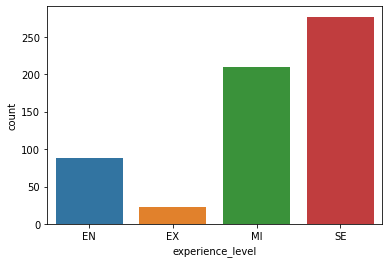

In [17]:
sns.countplot(x = "experience_level", data = salaries)
# most salaries are SE level while the least are EX level

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

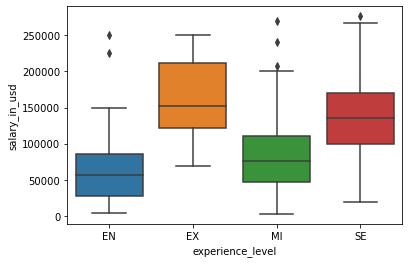

In [18]:
sns.boxplot(x = "experience_level", y = "salary_in_usd", data = salaries)
# as one would expect, salaries increase as experience increases
# entry -> middle -> senior -> executive
# executive has the highest spread in salaries

In [19]:
model = ols('salary_in_usd ~ C(experience_level)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across experience levels

,sum_sq,df,F,PR(>F)
C(experience_level),5.938756e+11,3.0,80.977282,6.449069e-44
Residual,1.449659e+12,593.0,NaN,NaN


### Employment Type
Almost every salary in the dataset comes from a full-time employee. The ANOVA test shows that the means are statistically different across `employment_type`.

<AxesSubplot:xlabel='employment_type', ylabel='count'>

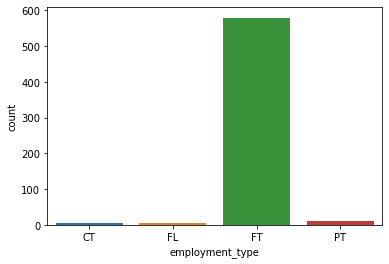

In [20]:
sns.countplot(x = "employment_type", data = salaries)
# almost all salaries are from full-time employees

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

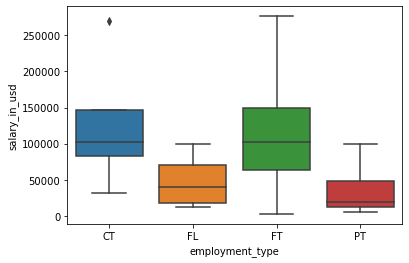

In [21]:
sns.boxplot(x = "employment_type", y = "salary_in_usd", data = salaries)
# there is quite a bit of difference in median salary across the 4 employment types
# CT being the highest and PT being the lowest

In [22]:
model = ols('salary_in_usd ~ C(employment_type)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across employment type

,sum_sq,df,F,PR(>F)
C(employment_type),7.183555e+10,3.0,7.201656,0.000094
Residual,1.971699e+12,593.0,NaN,NaN


### Job Title
Of the 50 different job titles, most salaries come from Data Scientists, Data Engineers, and Data Analysts. To make this feature more manageable, I will only keep the top 10% of job titles (top 5 titles).

The ANOVA test shows that the means are statistically different across job titles using the top 5 and "Other".

<AxesSubplot:xlabel='job_title', ylabel='count'>

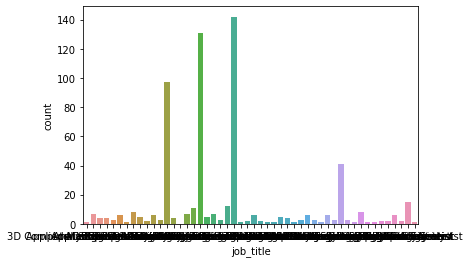

In [23]:
sns.countplot(x = "job_title", data = salaries)
# we see only a handful of job titles have significant prevalence in the data

In [24]:
salaries.value_counts("job_title")

job_title
Data Scientist                              142
Data Engineer                               131
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           15
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Data Analytics Manager                        7
AI Scientist                                  7
Data Science Consultant                       7
Lead Data Engineer                            6
Director of Data Science                      6
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Principal Data Scientist                      6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [25]:
top_5_titles = salaries.value_counts("job_title")[:5] # top 10% of titles
salaries["job_title"] = (salaries.
                         job_title.
                         apply(lambda x: x 
                               if x in top_5_titles 
                               else "Other"))
salaries.value_counts("job_title")

job_title
Other                        171
Data Scientist               142
Data Engineer                131
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            15
dtype: int64

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

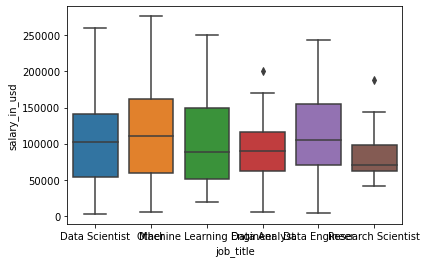

In [26]:
sns.boxplot(x = "job_title", y = "salary_in_usd", data = salaries)
# there is somewhat of a noticeable difference between job titles
# as we should expect, the largest spread belongs to "Other"

In [27]:
model = ols('salary_in_usd ~ C(job_title)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across job titles

,sum_sq,df,F,PR(>F)
C(job_title),4.077035e+10,5.0,2.406203,0.035614
Residual,2.002764e+12,591.0,NaN,NaN


### Employee Residence
Similar to `job_title`, I will do the same with `employee_residence` and only keep the top 10% of the 57 countries  (top 6 countries). The United States has by far the highest salaries.

The ANOVA test shows the means are statistically different across the top 6 countries and "Other".

<AxesSubplot:xlabel='employee_residence', ylabel='count'>

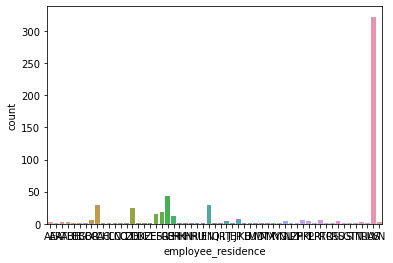

In [28]:
sns.countplot(x = "employee_residence", data = salaries)

In [29]:
salaries.value_counts("employee_residence")

employee_residence
US    322
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PK      6
BR      6
PT      6
NL      5
IT      4
PL      4
RU      4
AU      3
AT      3
VN      3
AE      3
TR      3
SG      2
RO      2
MX      2
BE      2
NG      2
DK      2
HU      2
SI      2
CL      1
CZ      1
CO      1
CN      1
MT      1
CH      1
BO      1
BG      1
UA      1
AR      1
TN      1
RS      1
DZ      1
EE      1
MD      1
PR      1
PH      1
HK      1
HN      1
HR      1
IE      1
NZ      1
IR      1
MY      1
JE      1
KE      1
LU      1
IQ      1
dtype: int64

In [30]:
top_6_countries = salaries.value_counts("employee_residence")[:6] # top 10% of residences
salaries["employee_residence"] = (salaries.
                                  employee_residence.
                                  apply(lambda x: x 
                                        if x in top_6_countries 
                                        else "Other"))
salaries.value_counts("employee_residence")

employee_residence
US       322
Other    129
GB        44
IN        30
CA        29
DE        25
FR        18
dtype: int64

<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

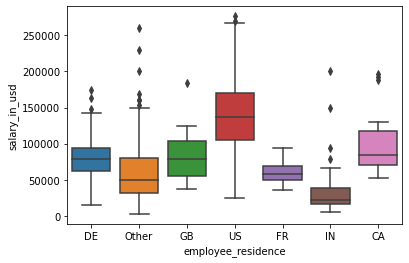

In [31]:
sns.boxplot(x = "employee_residence", y = "salary_in_usd", data = salaries)
# US has highest median, India has lowest
# quite a bit of difference across medians

In [32]:
model = ols('salary_in_usd ~ C(employee_residence)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across employee residence

,sum_sq,df,F,PR(>F)
C(employee_residence),8.675354e+11,6.0,72.540592,1.288758e-67
Residual,1.175999e+12,590.0,NaN,NaN


### Remote Ratio
The countplot of `remote_ratio` shows that most employees in the data are 100% remote. The ANOVA test show that means are statistically different across remote ratios.

<AxesSubplot:xlabel='remote_ratio', ylabel='count'>

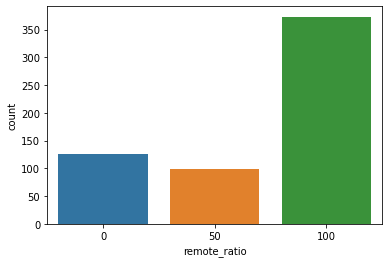

In [33]:
sns.countplot(x = "remote_ratio", data = salaries)
# most salaries in the data are from 100% remote employees

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

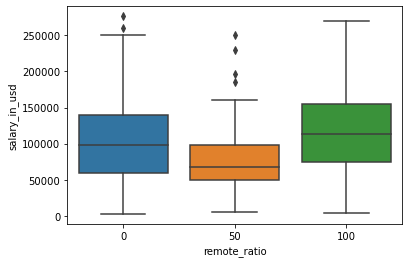

In [34]:
sns.boxplot(x = "remote_ratio", y = "salary_in_usd", data = salaries)

In [35]:
model = ols('salary_in_usd ~ C(remote_ratio)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across remote ratio

,sum_sq,df,F,PR(>F)
C(remote_ratio),1.192800e+11,2.0,18.410342,1.747892e-08
Residual,1.924254e+12,594.0,NaN,NaN


### Company Location
Again, like `job_title` and `employee_residence` I will take the top 10% (top 5 of 50) of `company_location` to make the feature more manageable. The vast majority of our dataset have a company location in the United States.

The ANOVA test shows that the means are statistically different across company locations.

<AxesSubplot:xlabel='company_location', ylabel='count'>

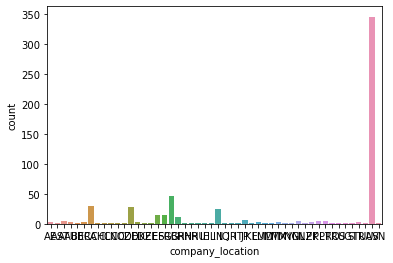

In [36]:
sns.countplot(x = "company_location", data = salaries)

In [37]:
salaries.value_counts("company_location")

company_location
US    345
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
AT      4
PT      4
PL      4
NL      4
DK      3
LU      3
AE      3
MX      3
AU      3
TR      3
PK      3
BR      3
NG      2
IT      2
CN      2
BE      2
CZ      2
RU      2
SI      2
CH      2
CO      1
EE      1
CL      1
DZ      1
AS      1
VN      1
HN      1
HR      1
HU      1
IE      1
IQ      1
IR      1
KE      1
MD      1
MT      1
MY      1
NZ      1
RO      1
SG      1
UA      1
IL      1
dtype: int64

In [38]:
top_5_locations = salaries.value_counts("company_location")[:5] # top 10% of locations
salaries["company_location"] = (salaries.
                                company_location.
                                apply(lambda x: x 
                                      if x in top_5_locations 
                                      else "Other"))
salaries.value_counts("company_location")

company_location
US       345
Other    123
GB        47
CA        30
DE        28
IN        24
dtype: int64

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

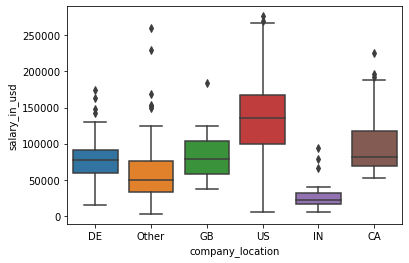

In [39]:
sns.boxplot(x = "company_location", y = "salary_in_usd", data = salaries)
# similar looking plot as employee residences

In [40]:
model = ols('salary_in_usd ~ C(company_location)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across company location

,sum_sq,df,F,PR(>F)
C(company_location),7.765106e+11,5.0,72.440289,4.103948e-59
Residual,1.267024e+12,591.0,NaN,NaN


### Company Size
Most employees work for medium sized companies. Small companies have the lowest salaries. The ANOVA test shows that means are statistically different across company sizes.

<AxesSubplot:xlabel='company_size', ylabel='count'>

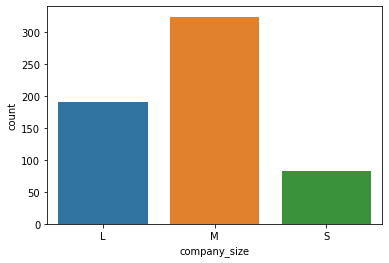

In [41]:
sns.countplot(x = "company_size", data = salaries)

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

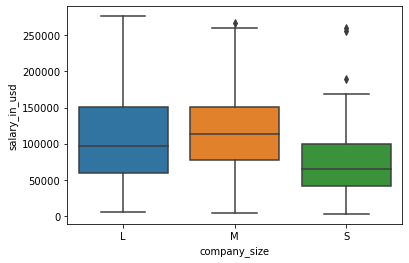

In [42]:
sns.boxplot(x = "company_size", y = "salary_in_usd", data = salaries)
# small companies stand out with a lower median salary

In [43]:
model = ols('salary_in_usd ~ C(company_size)', data = salaries).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

# means are different across company size

,sum_sq,df,F,PR(>F)
C(company_size),1.141286e+11,2.0,17.568202,3.866910e-08
Residual,1.929406e+12,594.0,NaN,NaN


In [44]:
salaries = salaries.drop(columns = ["salary", "salary_currency"])
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Other,260000,Other,0,Other,S
2,2020,SE,FT,Other,109024,GB,50,GB,M
3,2020,MI,FT,Other,20000,Other,0,Other,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [45]:
salaries.nunique()

work_year               3
experience_level        4
employment_type         4
job_title               6
salary_in_usd         360
employee_residence      7
remote_ratio            3
company_location        6
company_size            3
dtype: int64

In [46]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           597 non-null    category
 1   experience_level    597 non-null    category
 2   employment_type     597 non-null    category
 3   job_title           597 non-null    object  
 4   salary_in_usd       597 non-null    int64   
 5   employee_residence  597 non-null    object  
 6   remote_ratio        597 non-null    category
 7   company_location    597 non-null    object  
 8   company_size        597 non-null    category
dtypes: category(5), int64(1), object(3)
memory usage: 46.9+ KB


In [47]:
salaries["job_title"] = salaries["job_title"].astype("category")
salaries["employee_residence"] = salaries["employee_residence"].astype("category")
salaries["company_location"] = salaries["company_location"].astype("category")
salaries.info()
# we will use 8 categorical features to try to predict the numeric salary_in_usd variable
# we will have to create dummy variables for our categorical features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           597 non-null    category
 1   experience_level    597 non-null    category
 2   employment_type     597 non-null    category
 3   job_title           597 non-null    category
 4   salary_in_usd       597 non-null    int64   
 5   employee_residence  597 non-null    category
 6   remote_ratio        597 non-null    category
 7   company_location    597 non-null    category
 8   company_size        597 non-null    category
dtypes: category(8), int64(1)
memory usage: 35.4 KB


### Dummy Variables

In [48]:
# prefixes for dummy variables
salaries["work_year"] = "Year_" + salaries["work_year"].astype(str)
salaries["experience_level"] = "Experience_" + salaries["experience_level"].astype(str)
salaries["employment_type"] = "Type_" + salaries["employment_type"].astype(str)
salaries["job_title"] = "Title_" + salaries["job_title"].astype(str)
salaries["employee_residence"] = "Residence_" + salaries["employee_residence"].astype(str)
salaries["remote_ratio"] = "Remote_" + salaries["remote_ratio"].astype(str)
salaries["company_location"] = "Location_" + salaries["company_location"].astype(str)
salaries["company_size"] = "Size_" + salaries["company_size"].astype(str)

# make sure still category features
salaries["work_year"] = salaries["work_year"].astype("category")
salaries["experience_level"] = salaries["experience_level"].astype("category")
salaries["employment_type"] = salaries["employment_type"].astype("category")
salaries["job_title"] = salaries["job_title"].astype("category")
salaries["employee_residence"] = salaries["employee_residence"].astype("category")
salaries["remote_ratio"] = salaries["remote_ratio"].astype("category")
salaries["company_location"] = salaries["company_location"].astype("category")
salaries["company_size"] = salaries["company_size"].astype("category")

# create dummy variables and create one data frame
df_year = pd.get_dummies(salaries["work_year"])
df_level = pd.get_dummies(salaries["experience_level"])
df_type = pd.get_dummies(salaries["employment_type"])
df_title = pd.get_dummies(salaries["job_title"])
df_residence = pd.get_dummies(salaries["employee_residence"])
df_remote = pd.get_dummies(salaries["remote_ratio"])
df_location = pd.get_dummies(salaries["company_location"])
df_size = pd.get_dummies(salaries["company_size"])

In [49]:
salaries_dummy = pd.concat([salaries, 
           df_year,
           df_level,
           df_type,
           df_title,
           df_residence,
           df_remote,
           df_location,
           df_size], 
          axis = 1).drop(columns = ["work_year",
                                    "experience_level",
                                    "employment_type",
                                    "job_title",
                                    "employee_residence",
                                    "remote_ratio",
                                    "company_location",
                                    "company_size"])

## Modeling

### Train & Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = salaries_dummy.drop("salary_in_usd", axis = "columns")
y = salaries_dummy["salary_in_usd"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression().fit(X_train, y_train)

### Performance

In [55]:
model.score(X_train, y_train)

0.6054845153145652

In [56]:
model.score(X_test, y_test)

0.5504907270076074

In [57]:
y_pred = model.predict(X_test)

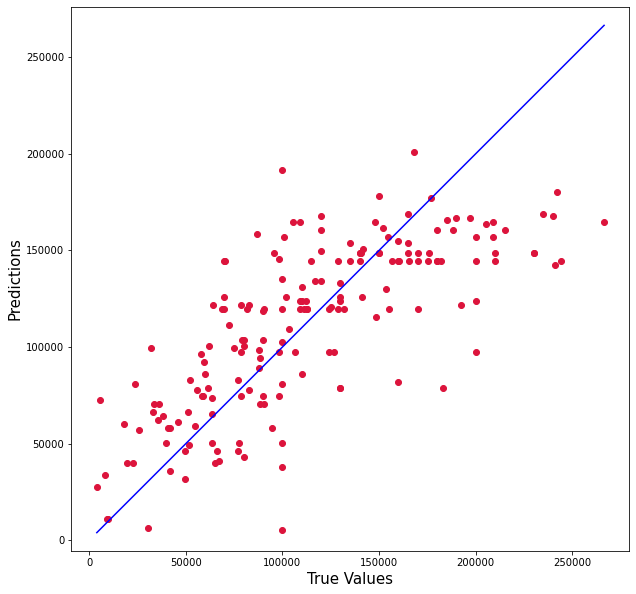

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model = RandomForestRegressor(random_state = 777).fit(X_train, y_train)

### Performance

In [68]:
model.score(X_train, y_train)

0.8164452982814051

In [69]:
model.score(X_test, y_test)

0.49960374321180656

In [70]:
y_pred = model.predict(X_test)

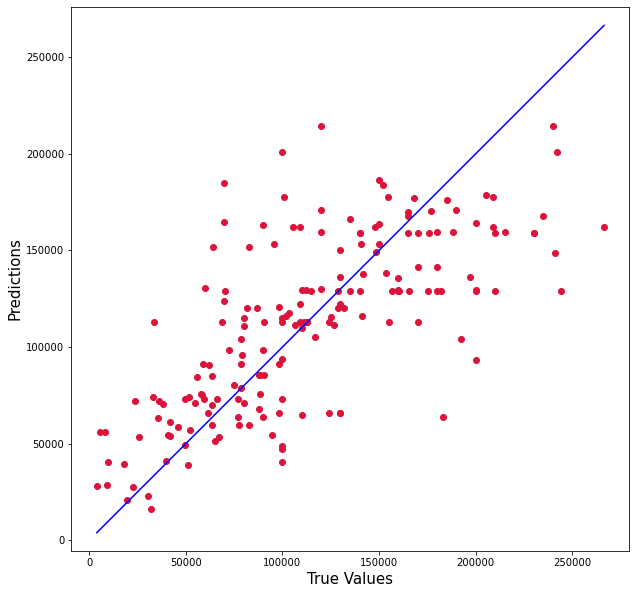

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Tuning to improve upon overfitting

In [72]:
from pprint import pprint
pprint(model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 777,
 'verbose': 0,
 'warm_start': False}


In [73]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose = 2, random_state = 777, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=777, verbose=2)

In [75]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [76]:
best_random = rf_random.best_estimator_
best_random.score(X_train, y_train)

0.7022849593590285

In [77]:
best_random.score(X_test, y_test)

0.5613454816901078

In [84]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [60, 70, 80],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1500, 1600, 1700]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 25.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [60, 70, 80],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [1500, 1600, 1700]},
             verbose=2)

In [85]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 1600}

### Tuning Performance

In [86]:
best_grid = grid_search.best_estimator_
best_grid.score(X_train, y_train)

0.6909765975632254

In [87]:
best_grid.score(X_test, y_test)

0.5618668833415463

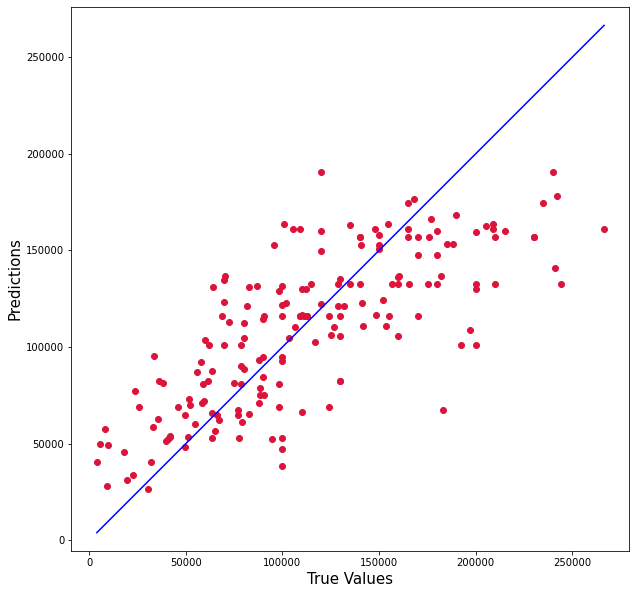

In [88]:
y_pred = best_grid.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Xgboost

In [89]:
import xgboost as xgb

In [93]:
model = xgb.XGBRegressor(use_label_encoder = False, random_state = 777).fit(X_train, y_train)

### Performance

In [94]:
model.score(X_train, y_train)

0.8539272742142202

In [95]:
model.score(X_test, y_test)

0.46722717665418767

In [96]:
y_pred = model.predict(X_test)

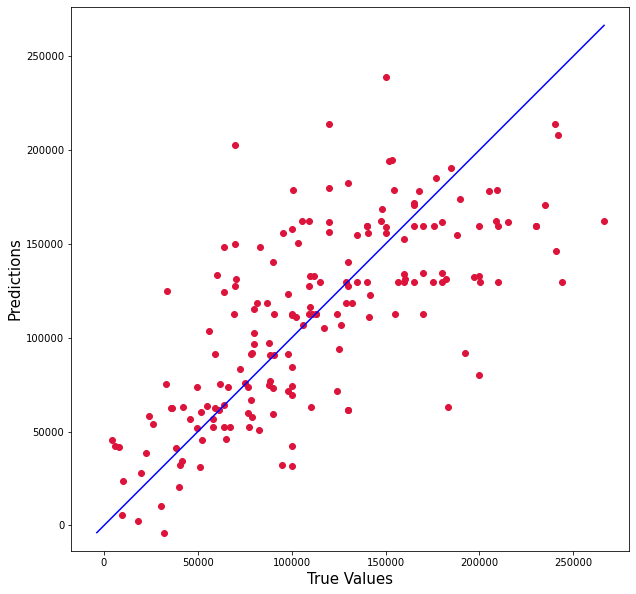

In [97]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Tuning to improve upon overfitting

In [98]:
pprint(model.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'reg:squarederror',
 'random_state': 777,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


In [106]:
max_depth = range(3, 10, 2)
min_child_weight = range(1, 6, 2)
gamma = [i/10.0 for i in range(0,5)]
subsample = [i/10.0 for i in range(6,10)]
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
learning_rate = [1e-5, 1e-2, 0.1]
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 5)]

# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'gamma': gamma,
               'subsample': subsample,
               'reg_alpha': reg_alpha,
               'learning_rate': learning_rate,
               'n_estimators': n_estimators
              }

pprint(random_grid)

{'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [1e-05, 0.01, 0.1],
 'max_depth': range(3, 10, 2),
 'min_child_weight': range(1, 6, 2),
 'n_estimators': [1000, 1250, 1500, 1750, 2000],
 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [107]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgboost = xgb.XGBRegressor(use_label_encoder = False)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgboost, param_distributions = random_grid, n_iter = 100, cv = 5, 
                                verbose = 2, random_state = 777, n_jobs = 3)

# Fit the random search model
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  5.6min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 11.1min
/Users/zachwolf/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed: 15.1min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          use_label_encoder=False,
                                          validate_parameters=None,
                                          verbosity=Non

In [108]:
xgb_random.best_params_

{'subsample': 0.8,
 'reg_alpha': 1,
 'n_estimators': 1000,
 'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.01,
 'gamma': 0.3}

In [109]:
best_random = xgb_random.best_estimator_
best_random.score(X_train, y_train)

0.7056106749101234

In [110]:
best_random.score(X_test, y_test)

0.5763910692797204

In [113]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'subsample': [0.7, 0.8, 0.9],
    'reg_alpha': [0.5, 1.0, 1.5],
    'n_estimators': [800, 1000, 1200],
    'min_child_weight': [4, 5, 6],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01],
    'gamma': [0.2, 0.3, 0.4]
}
# Create a based model
xgboost = xgb.XGBRegressor(use_label_encoder = False)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgboost, param_grid = param_grid, 
                           cv = 5, n_jobs = 3, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   19.0s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 20.7min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 25.3min
[Parallel(n_jobs=3)]: Done 1452 tasks      | elapsed: 39.0min
[Parallel(n_jobs=3)]: Done 1979 tasks      | elapsed: 44.9min
[Parallel(n_jobs=3)]: Done 2586 tasks      | elapsed: 61.2min
[Parallel(n_jobs=3)]: Done 3275 tasks      | elapsed: 68.9min
[Parallel(n_jobs=3)]: Done 3645 out of 3645 | elapsed: 74.1min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, use_label_encoder=False,
                                    validate_parameters=None, verbosi

In [114]:
grid_search.best_params_

{'gamma': 0.2,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 800,
 'reg_alpha': 1.5,
 'subsample': 0.7}

### Tuning Performance

In [115]:
best_grid = grid_search.best_estimator_
best_grid.score(X_train, y_train)

0.6964920008813791

In [116]:
best_grid.score(X_test, y_test)

0.5804600818798031

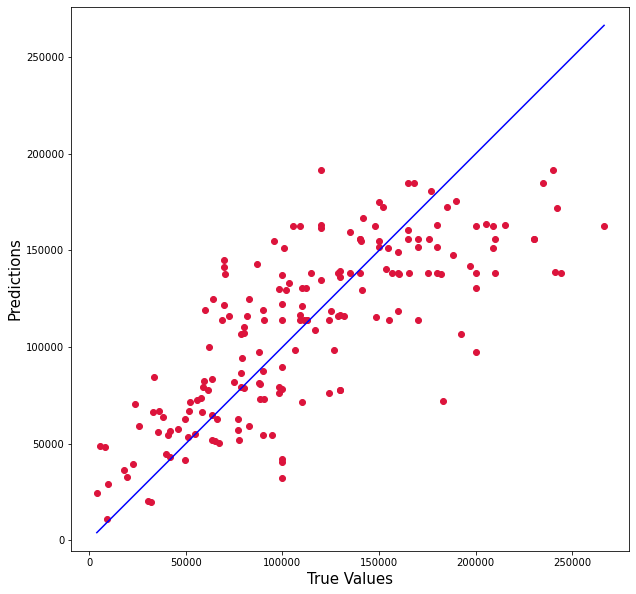

In [117]:
y_pred = best_grid.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

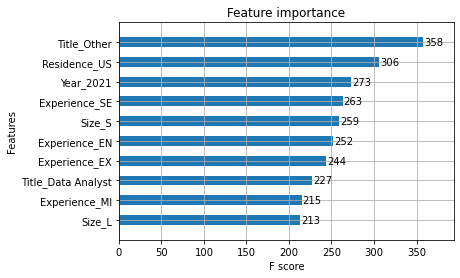

In [126]:
from xgboost import plot_importance
plot_importance(best_grid, max_num_features = 10, height = 0.5)

In [139]:
X_test["prediction"] = y_pred
X_test["actual"] = y_test
X_test.sort_values("prediction", ascending = False)

# The highest predictions are

<ipython-input-139-43e665c9ce1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["prediction"] = y_pred
<ipython-input-139-43e665c9ce1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["actual"] = y_test


,Year_2020,Year_2021,Year_2022,Experience_EN,Experience_EX,Experience_MI,Experience_SE,Type_CT,Type_FL,Type_FT,...,Location_DE,Location_GB,Location_IN,Location_Other,Location_US,Size_L,Size_M,Size_S,prediction,actual
141,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,191831.312500,240000
209,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,191831.312500,120000
165,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,185026.203125,165000
173,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,185026.203125,235000
343,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,184705.015625,167875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,29307.914062,10000
238,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,24246.851562,4000
109,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,20185.210938,30428
489,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,19788.427734,31875
